This analysis is in the order of Female then Male

In [1]:
install.packages('qtl') #Main package, for analysis
install.packages('qtlcharts') #accessory, for displaying graphs
install.packages('LinkageMapView') #accessory, for displaying linkage maps
install.packages('rcompanion')# for plotNormalHistogram

Installing package into 'C:/Users/Courtney/Documents/R/win-library/3.6'
(as 'lib' is unspecified)



package 'qtl' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Courtney\AppData\Local\Temp\Rtmp0gZ7Jc\downloaded_packages


Installing package into 'C:/Users/Courtney/Documents/R/win-library/3.6'
(as 'lib' is unspecified)



package 'qtlcharts' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Courtney\AppData\Local\Temp\Rtmp0gZ7Jc\downloaded_packages


Installing package into 'C:/Users/Courtney/Documents/R/win-library/3.6'
(as 'lib' is unspecified)



package 'LinkageMapView' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Courtney\AppData\Local\Temp\Rtmp0gZ7Jc\downloaded_packages


Installing package into 'C:/Users/Courtney/Documents/R/win-library/3.6'
(as 'lib' is unspecified)



package 'rcompanion' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Courtney\AppData\Local\Temp\Rtmp0gZ7Jc\downloaded_packages


In [2]:
library(qtl) #load packages
library(qtlcharts)
library(LinkageMapView)
library(rcompanion)

In [ ]:
#Collecting enviroment variables
print("Make sure to input names AS THEY APPEAR on the csv!!") #Just a user warning
fileName <- readline("Enter file name (Either FemaleMap.csv or MaleMap.csv): ") #Mapping table file
genotypeName <- c(readline("First Genotype (homozygous) (For example ll): "),
                  readline("Second Genotype (heterozygous) (for example lm): ")) #For example "nn", "np"
alleleName <- c(substr(genotypeName[2],1,1) ,substr(genotypeName[2],2,2))
naNames <- c("NA","--") #For example "NA", "--"
colNum <- as.numeric(readline("Column Number: ")) #Column for pheno of interest

[1] "Make sure to input names AS THEY APPEAR on the csv!!"


Enter file name (Either FemaleMap.csv or MaleMap.csv):  FemaleMap.csv
First Genotype (homozygous) (For example ll):  ll
Second Genotype (heterozygous) (for example lm):  lm


 --Read the following data:
	 294  individuals
	 1100  markers
	 38  phenotypes


Warning message in summary.cross(cross):
"Some markers at the same position on chr 1,2,4,5,7,8,9,10,11,12,13,14,16,17,18,19; use jittermap()."


 --Cross type: bc 


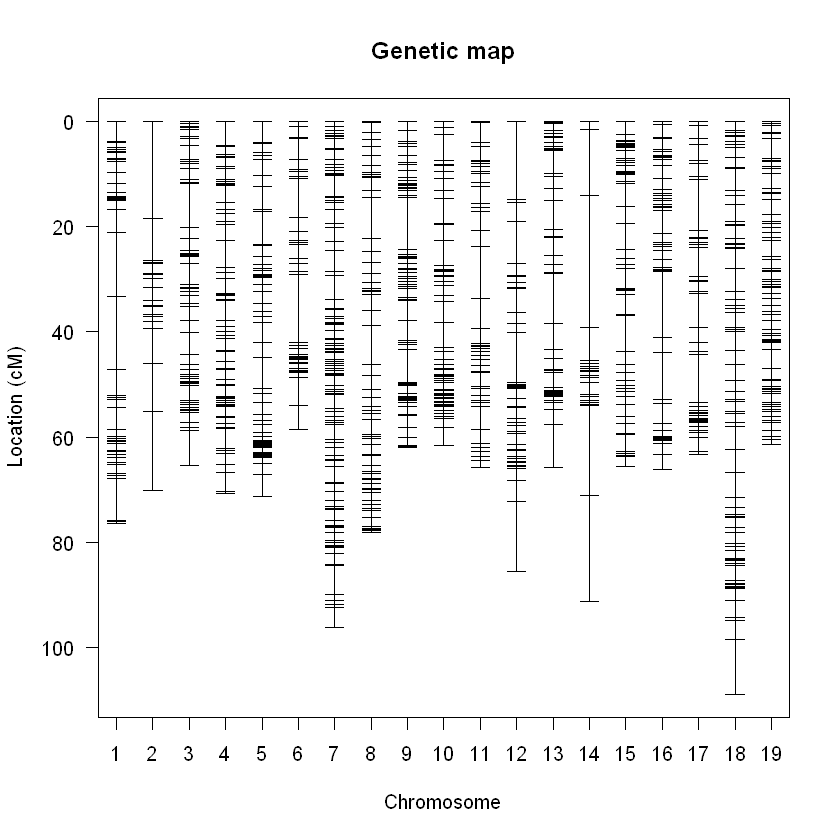

In [4]:
#Map generation
Map <- read.cross(format = 'csv',file = fileName 
                  ,genotypes = genotypeName,
                  alleles = alleleName,na.strings = naNames) #generate linkage map
Map <- jittermap(Map) #make sure no markers are in the same location
Map <- calc.genoprob(Map,step = 1,map.function = "kosambi") #associate markers with full genotypes
plot.map(Map) #draw linkage map

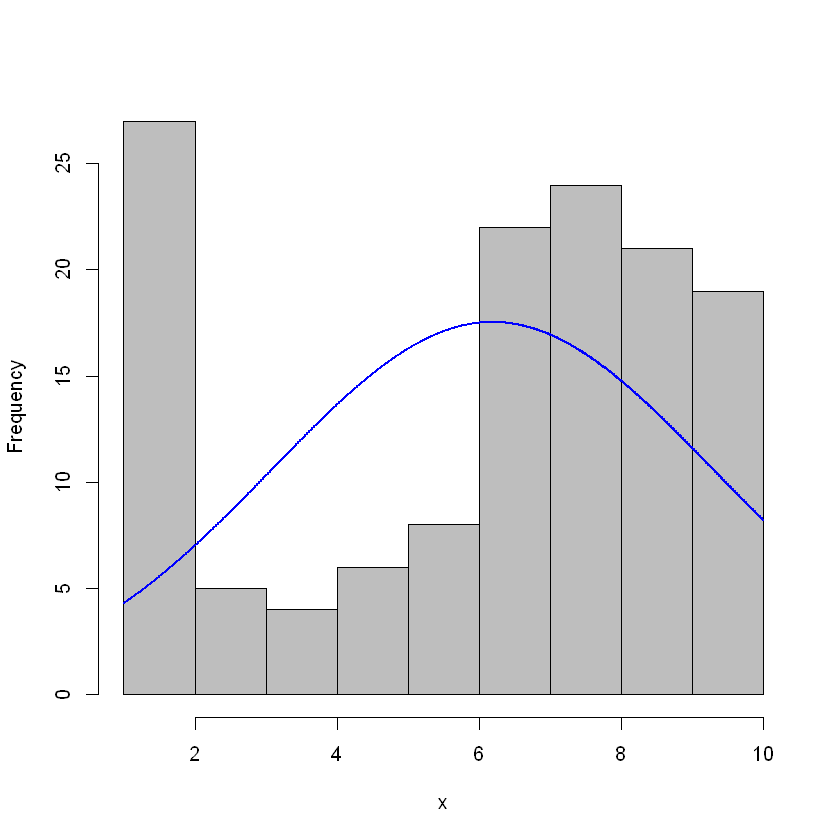

In [5]:
plotNormalHistogram(Map$pheno[,colNum]) #normal histogram of pheno of interest

Outliers exist in this dataset. Will need to be analyized. 

LOD thresholds (1000 permutations)
   [,1]
5% 4.18
1% 5.02

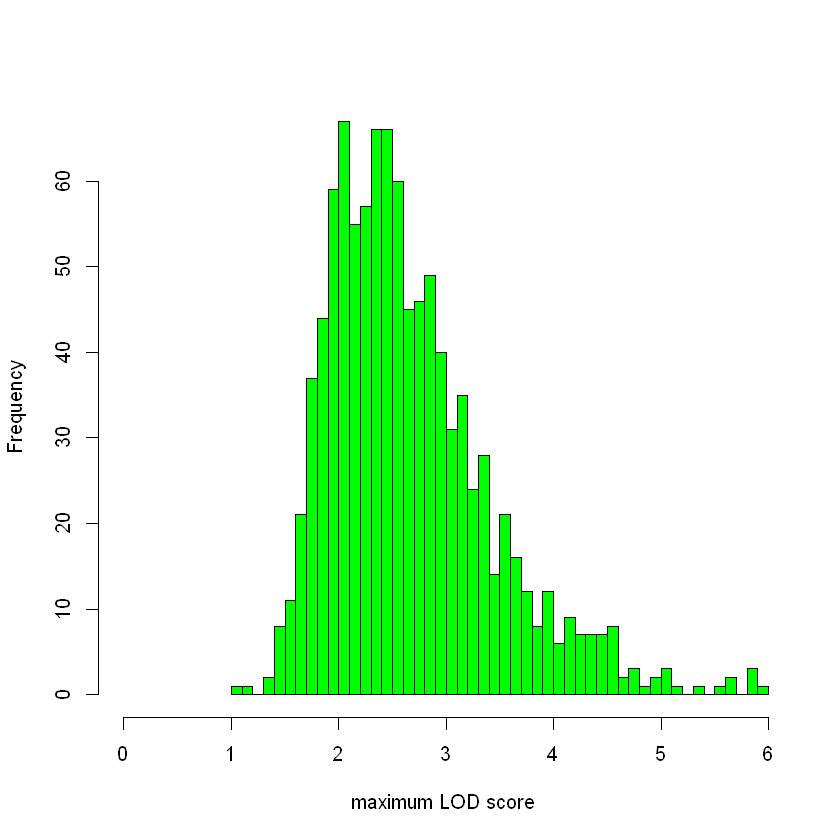

In [6]:
#Compute statistically significant values
TraitCIM1000 <- cim(Map,pheno.col = colNum,method = "hk",
                    map.function = "kosambi",n.perm = 1000) # Function will take a moment to run, determines LOD value
plot(TraitCIM1000,col = 'green') #show distribution of lod scores
summary(TraitCIM1000,alpha=c(.05,.01))

[1] "If nothing shows up, the values \n      are below the LOD5 score"


,chr,pos,lod
,<fct>,<dbl>,<dbl>
c1.loc56,1,56.000000,0.1405595
c2.loc23,2,23.000000,0.1102395
3_5306858,3,30.948024,0.7574281
4_1554457,4,6.230003,0.5623337
5_21771573,5,61.534045,3.8626405
c6.loc51,6,51.000000,0.9843859
7_8168271,7,35.590035,0.8720153
c8.loc19,8,19.000000,0.8535359
9_2597721,9,12.621018,1.4493391


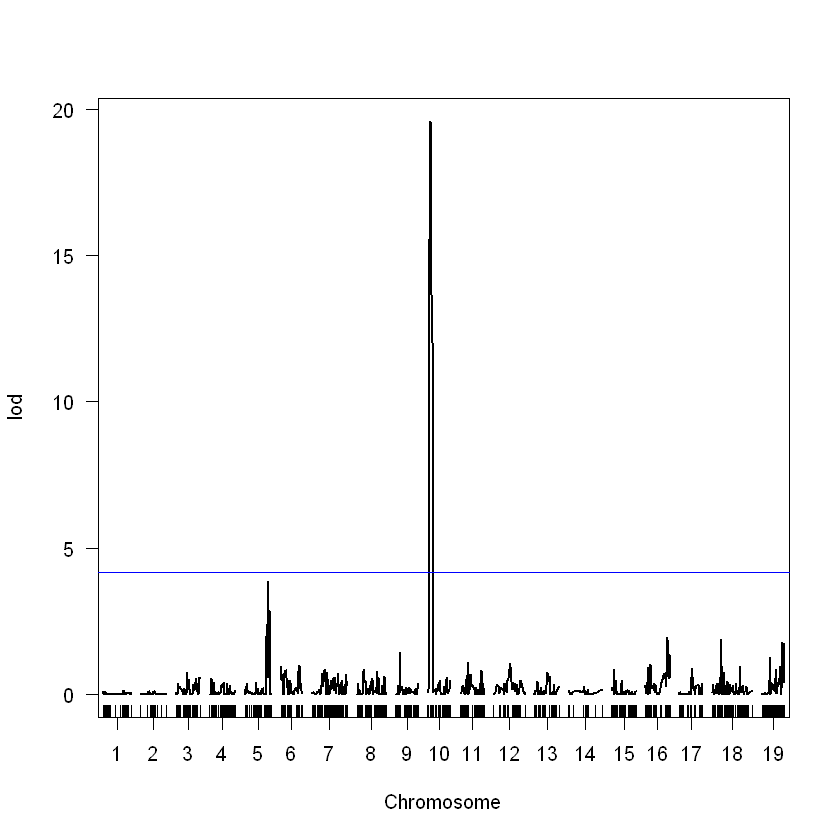

In [7]:
#Deterime LOD Values
LOD5 <- summary(TraitCIM1000,alpha=c(.05))
TraitCIM<-cim(Map,pheno.col = colNum,method = "hk",
              map.function = "kosambi") #Generate LOD Values
plot(TraitCIM) #show LOD graph
abline(h = LOD5,col = "blue") #overlay statistically significant line
print("If nothing shows up, the values 
      are below the LOD5 score") #warning for no peaks
summary(TraitCIM)

Chromosome?  10


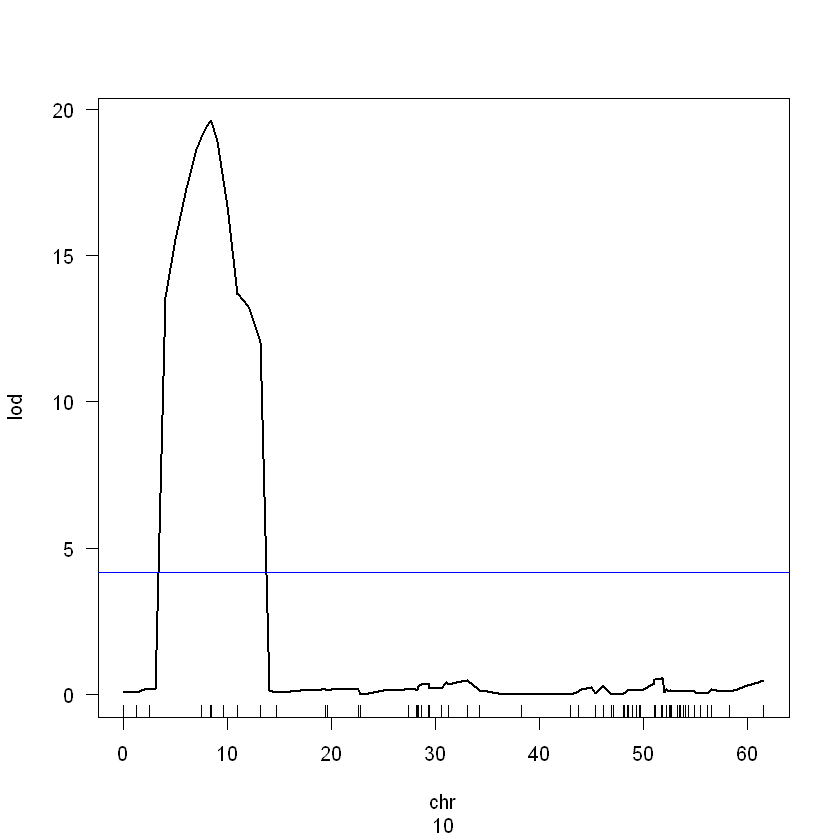

In [8]:
#Chromosomal Analysis
chr <- as.numeric(readline("Chromosome? ")) #collect chromosome to look at
plot(TraitCIM, chr = chr,xlab = c("chr",chr)) #Plot chr LOD scores
abline(h = LOD5, col = "blue") #Statistically Significant

In [9]:
bayesint(TraitCIM, chr = chr, prob=0.95, expandtomarkers=TRUE) #calculate bayesian interval
lodint(TraitCIM, chr = chr,expandtomarkers = TRUE ) #calculate LOD Support interval

,chr,pos,lod
,<fct>,<dbl>,<dbl>
17_17189406,10,2.459002,0.1738651
17_17189484,10,8.281005,19.5801727
10_2674703,10,9.536007,17.5567395


,chr,pos,lod
,<fct>,<dbl>,<dbl>
17_17189406,10,2.459002,0.1738651
17_17189484,10,8.281005,19.5801727
10_2674703,10,9.536007,17.5567395


In [10]:
p <- as.numeric(readline("Position for analysis: "))
qtl <- makeqtl(Map, chr = chr, pos = p, what="prob") #pulls genotype probabilities
fitqtl <- fitqtl(Map, pheno.col=colNum, qtl = qtl, covar=NULL,
       method= "hk",model="normal",
       dropone=TRUE, get.ests=TRUE,run.checks=TRUE,
       tol=1e-4, maxit=1000, forceXcovar=FALSE) #sees how well our data fits a given formula 
          # If you see "error: object of type 'closure' is not subsettable", remove "formula," from the fitqtl argument list.
summary(fitqtl) #Print results of the analysis

Position for analysis:  8.281005


Warning message in getsex(cross):
"125 individuals with missing sex; assuming they're female"
Warning message in fitqtlengine(pheno = pheno, qtl = qtl, covar = covar, formula = formula, :
"Dropping 158 individuals with missing phenotypes.
"
Warning message in getsex(cross):
"125 individuals with missing sex; assuming they're female"



		fitqtl summary

Method: Haley-Knott regression 
Model:  normal phenotype
Number of observations : 136 

Full model result
----------------------------------  
Model formula: y ~ Q1 

       df        SS         MS      LOD     %var Pvalue(Chi2) Pvalue(F)
Model   1  591.3682 591.368201 18.06299 45.75399            0         0
Error 134  701.1272   5.232292                                         
Total 135 1292.4954                                                    


Estimated effects:
-----------------
              est      SE      t
Intercept  6.0912  0.1963  31.02
10@8.3    -4.1747  0.3927 -10.63


In [11]:
#Collecting enviroment variables
print("Make sure to input names AS THEY APPEAR on the csv!!") #Just a user warning
fileName <- readline("Enter file name (Either FemaleMap.csv or MaleMap.csv): ") #Mapping table file
genotypeName <- c(readline("First Genotype (homozygous) (For example ll): "),
                  readline("Second Genotype (heterozygous) (for example lm): ")) #For example "nn", "np"
alleleName <- c(substr(genotypeName[2],1,1) ,substr(genotypeName[2],2,2))
naNames <- c("NA","--") #For example "NA", "--"
colNum <- as.numeric(readline("Column Number: ")) #Column for pheno of interest

[1] "Make sure to input names AS THEY APPEAR on the csv!!"


Enter file name (Either FemaleMap.csv or MaleMap.csv):  MaleMap.csv
First Genotype (homozygous) (For example ll):  nn
Second Genotype (heterozygous) (for example lm):  np
Column Number:  3


 --Read the following data:
	 294  individuals
	 1128  markers
	 38  phenotypes


Warning message in summary.cross(cross):
"Some markers at the same position on chr 1,3,4,5,6,7,8,9,10,12,13,14,15,16,17,18,19; use jittermap()."


 --Cross type: bc 


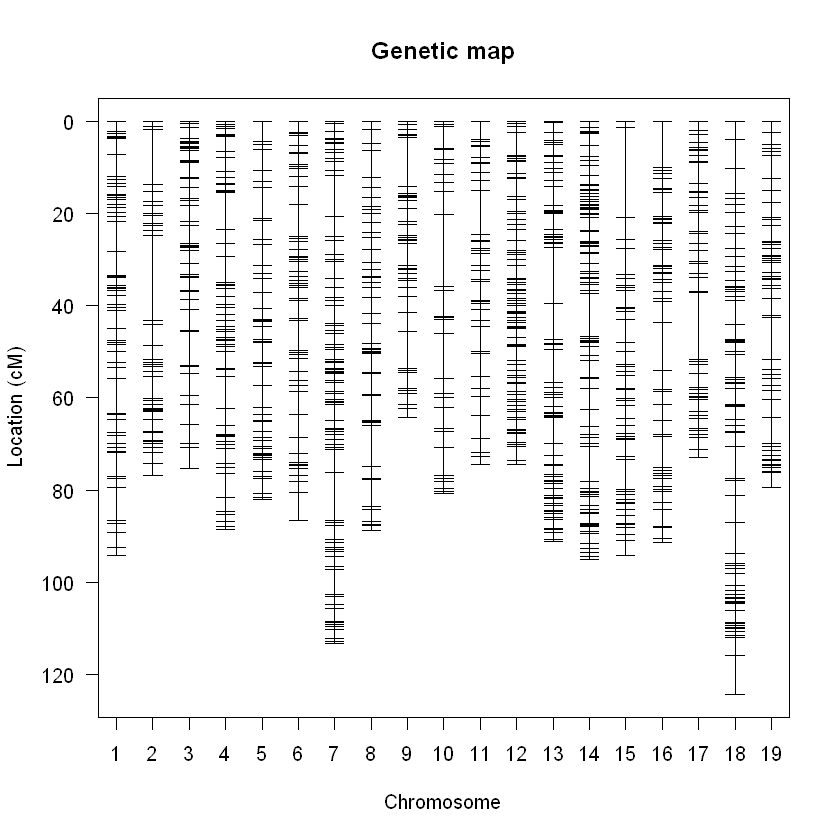

In [12]:
#Map generation
Map <- read.cross(format = 'csv',file = fileName 
                  ,genotypes = genotypeName,
                  alleles = alleleName,na.strings = naNames) #generate linkage map
Map <- jittermap(Map) #make sure no markers are in the same location
Map <- calc.genoprob(Map,step = 1,map.function = "kosambi") #associate markers with full genotypes
plot.map(Map) #draw linkage map

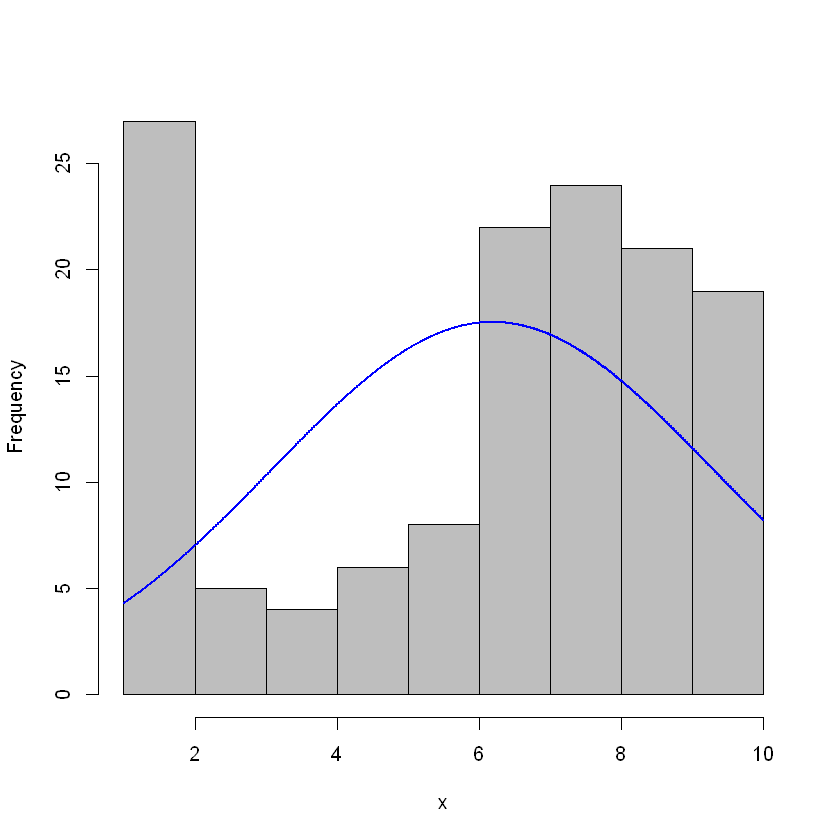

In [13]:
plotNormalHistogram(Map$pheno[,colNum]) #normal histogram of pheno of interest

Outliers exist in this data. 

LOD thresholds (1000 permutations)
   [,1]
5% 4.51
1% 5.43

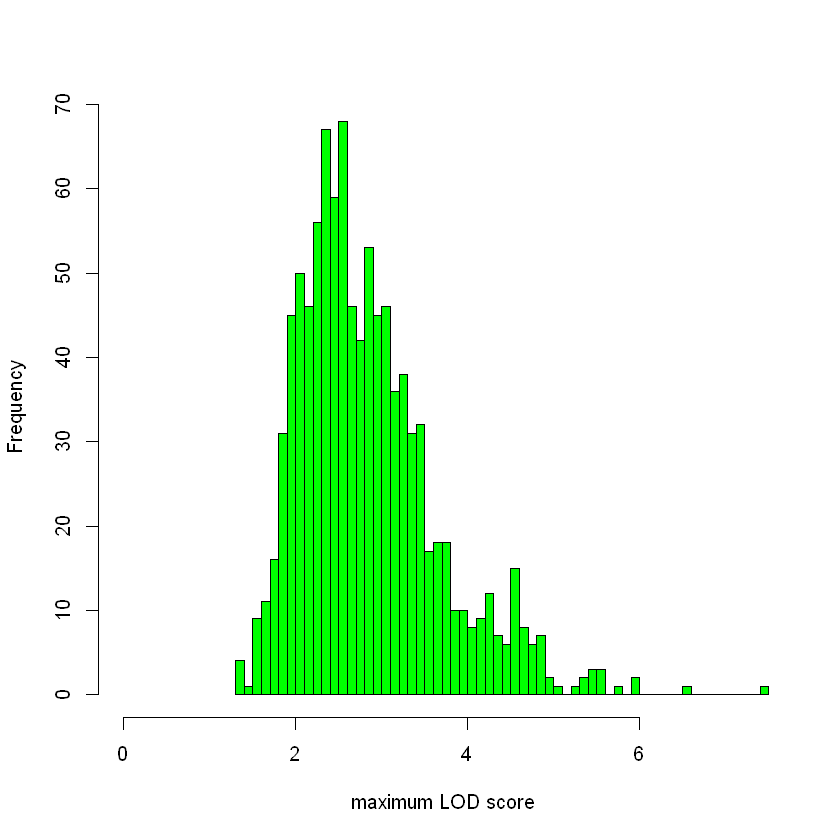

In [14]:
#Compute statistically significant values
TraitCIM1000 <- cim(Map,pheno.col = colNum,method = "hk",
                    map.function = "kosambi",n.perm = 1000) # Function will take a moment to run, determines LOD value
plot(TraitCIM1000,col = 'green') #show distribution of lod scores
summary(TraitCIM1000,alpha=c(.05,.01))

[1] "If nothing shows up, the values \n      are below the LOD5 score"


,chr,pos,lod
,<fct>,<dbl>,<dbl>
c1.loc83,1,83.00000,0.5129564
c2.loc14,2,14.00000,1.2027496
16_9895528,3,75.26705,0.5564929
7_19909323,4,71.05905,1.4673715
c5.loc53,5,53.00000,1.2699836
c6.loc66,6,66.00000,0.8215154
c7.loc56,7,56.00000,2.2224805
8_11656031,8,36.09402,1.7216995
c9.loc37,9,37.00000,1.1927533


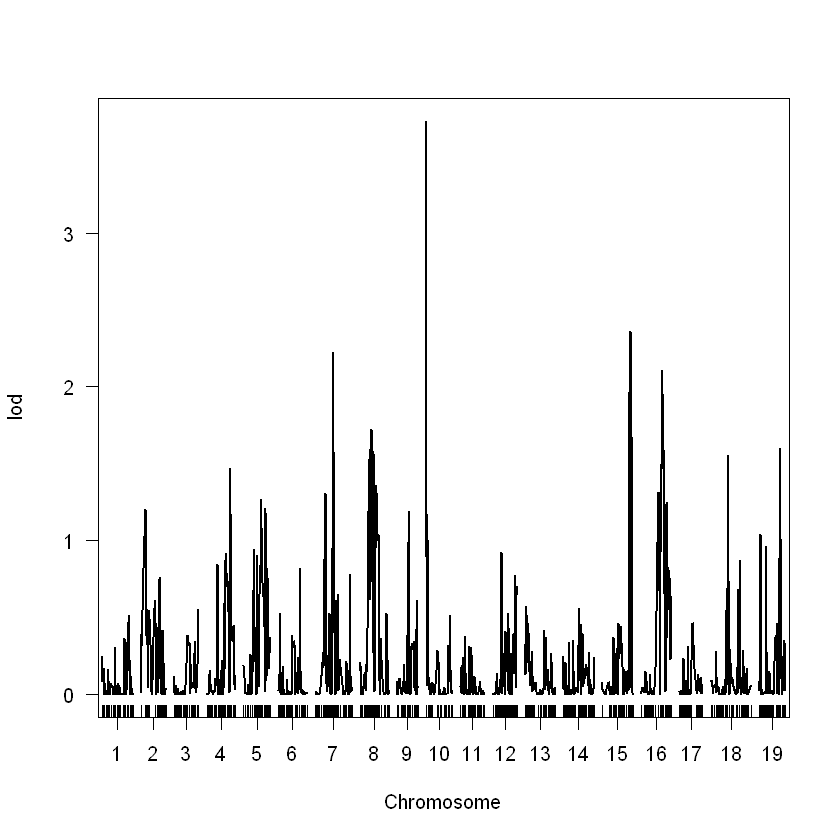

In [15]:
#Deterime LOD Values
TraitCIM<-cim(Map,pheno.col = colNum,method = "hk",
              map.function = "kosambi") #Generate LOD Values
plot(TraitCIM) #show LOD graph
abline(h = LOD5,col = "blue") #overlay statistically significant line
print("If nothing shows up, the values 
      are below the LOD5 score") #warning for no peaks
summary(TraitCIM)

Chromosome?  10


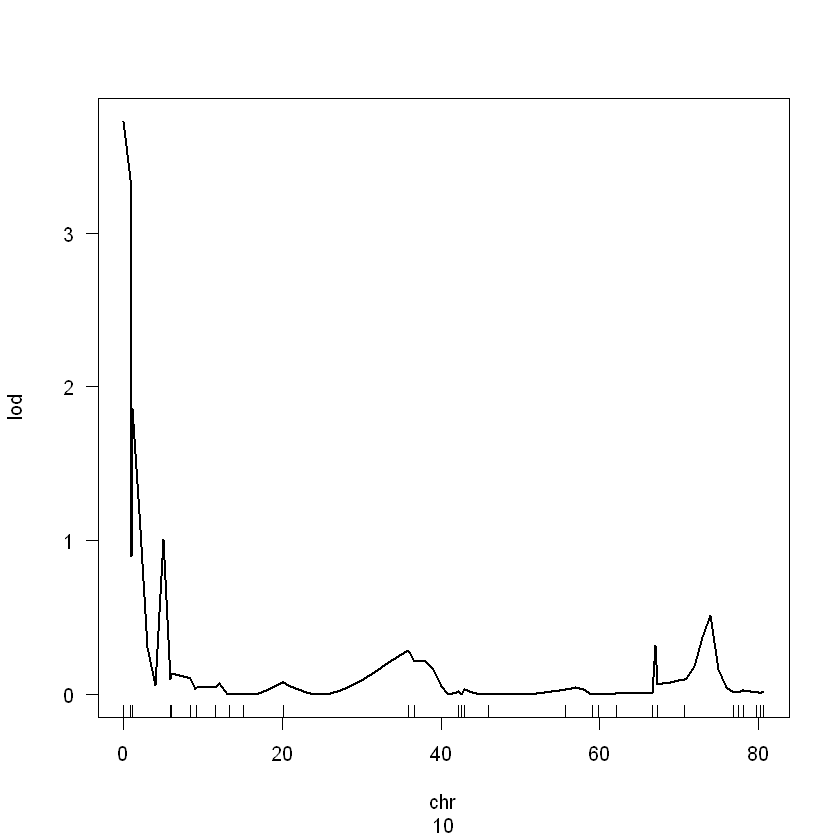

In [16]:
#Chromosomal Analysis
chr <- as.numeric(readline("Chromosome? ")) #collect chromosome to look at
plot(TraitCIM, chr = chr,xlab = c("chr",chr)) #Plot chr LOD scores
abline(h = LOD5, col = "blue") #Statistically Significant

In [17]:
bayesint(TraitCIM, chr = chr, prob=0.95, expandtomarkers=TRUE) #calculate bayesian interval
lodint(TraitCIM, chr = chr,expandtomarkers = TRUE ) #calculate LOD Support interval

,chr,pos,lod
,<fct>,<dbl>,<dbl>
10_710185,10,0.000000,3.725648
10_710185,10,0.000000,3.725648
10_402217,10,0.776002,3.346819


,chr,pos,lod
,<fct>,<dbl>,<dbl>
10_710185,10,0.000000,3.725648
10_710185,10,0.000000,3.725648
10_419927,10,1.040003,1.862525


In [18]:
p <- as.numeric(readline("Position for analysis: "))
qtl <- makeqtl(Map, chr = chr, pos = p, what="prob") #pulls genotype probabilities
fitqtl <- fitqtl(Map, pheno.col=colNum, qtl = qtl, covar=NULL,
       method= "hk",model="normal",
       dropone=TRUE, get.ests=TRUE,run.checks=TRUE,
       tol=1e-4, maxit=1000, forceXcovar=FALSE) #sees how well our data fits a given formula 
          # If you see "error: object of type 'closure' is not subsettable", remove "formula," from the fitqtl argument list.
summary(fitqtl) #Print results of the analysis

Position for analysis:  0


Warning message in getsex(cross):
"125 individuals with missing sex; assuming they're female"
Warning message in fitqtlengine(pheno = pheno, qtl = qtl, covar = covar, formula = formula, :
"Dropping 158 individuals with missing phenotypes.
"
Warning message in getsex(cross):
"125 individuals with missing sex; assuming they're female"



		fitqtl summary

Method: Haley-Knott regression 
Model:  normal phenotype
Number of observations : 136 

Full model result
----------------------------------  
Model formula: y ~ Q1 

       df        SS         MS      LOD     %var Pvalue(Chi2)    Pvalue(F)
Model   1  155.0759 155.075933 3.774568 11.99818 3.056227e-05 3.614484e-05
Error 134 1137.4195   8.488205                                            
Total 135 1292.4954                                                       


Estimated effects:
-----------------
             est     SE      t
Intercept 6.0565 0.2516 24.074
10@0.0    2.1511 0.5033  4.274
